<a href="https://colab.research.google.com/github/ohenriquesilvar/GCC_253/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**

- Henrique Silva Rabelo 202010698 

- Turma 14A

Link do repositório GitHub: https://github.com/ohenriquesilvar/GCC_253

- O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

- Trabalhos entregues após a data limite não serão aceitos

- Data limite de entrega: 26 de Julho de 2022 : 23h55m

- Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

- O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [115]:
import matplotlib.pyplot as plt
import random
import time
import sys
sys.setrecursionlimit(1500)

N = 100

### Funções geradoras de vetor

In [62]:
def arrayOrdered(n):
    return list(range(n))

def randomArray(n):
    random.seed(n)
    return [random.randint(0, n) for _ in range(n)]

def descendingArray(n):
    return list(reversed(arrayOrdered(n)))

def arrayEqual(n):
    v = random.randint(0, n)
    return [v for _ in range(n)]

orderedCase, descendingCase, randomCase = arrayOrdered , descendingArray , randomArray
legends = ['crescente', 'descrescente', 'aleatorio']


### Funções de tempo e plot do gŕafico

In [104]:
def timer(m, *args):
    start = time.time()
    m(*args)
    return time.time() - start

def sort(metod, arrays):
    return [[(i, metod(array(i))[0]) for i in range(5, N+1, 5)] for array in arrays]

def timeSort(metod, arrays):
    return [[(i, timer(metod, array(i))) for i in range(5, N+1, 5)] for array in arrays]

def plot(results, title, ylabel , optionalLabel = False):
    fig, ax = plt.subplots()
    for result, legend in zip(results, optionalLabel if optionalLabel else legends ):
        ax.plot([v[0] for v in result], [v[1] for v in result], label=legend)
    ax.set_xlabel('tamanho')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_title(title)

def sortEqual(metod, arrays, title, isTime = False):
    if not isTime:
      plot(sort(metod,arrays), title, 'comparações' , ('igual', 'aleatorio'))
    else:
      plot(sort(metod,arrays), title, 'tempo', ('igual', 'aleatorio'))

def sortPlot(metod, orderedCase, descendingCase, randomCase, title, isTime = False):
    if not isTime:
      plot(sort(metod, (orderedCase, descendingCase, randomCase)), title, 'comparações')
    else:
      plot(timeSort(metod, (orderedCase, descendingCase, randomCase)), title, 'tempo')


## Funções de ordenação

### Insertion Sort

In [64]:
def insertionSort(array):
  cont = 0
  for j in range(1,len(array)):
    key = array[j]
    i = j - 1
    while i >= 0 and array[i] > key:
      cont += 1
      array[i+1] = array[i]
      i = i-1
    array[i+1] = key
  return cont, array

### Merge Sort


In [65]:
def merge(a, p, q, r):
  cont = 0
  inf = float('inf')
  L = a[p:q+1] + [inf]
  R = a[q+1:r+1] + [inf]
  i, j = 0, 0
  for k in range(p, r + 1):
    cont += 1
    if L[i] <= R[j]:
      a[k] = L[i]
      i += 1
    else:
      a[k] = R[j]
      j += 1
  return cont

def mergeSortD(a, p, r):
  cont = 0
  if p < r:
    q = (p + r) // 2
    cont += mergeSortD(a, p, q)[0]
    cont += mergeSortD(a, q + 1, r)[0]
    cont += merge(a, p, q, r)
  return cont, a

def mergeSort(a):
  return mergeSortD(a, 0, len(a)-1)

### Selection Sort

In [66]:
def selectionSort(array):
  cont = 0
  for j in range(len(array)):
    minValuePos = j
    for i in range(j + 1, len(array)):
      cont += 1
      if array[i] < array[minValuePos]:
        minValuePos = i

    array[j], array[minValuePos] = array[minValuePos], array[j]
  return cont, array

### Bubblue Sort

In [67]:
def bubbleSort(a):
  cont = 0
  changed = True
  for i in range(len(a)-1):
    if not changed: break
    changed = False
    for j in range(len(a)-i-1):
      cont += 1
      if a[j] > a[j+1]:
        a[j+1], a[j] = a[j], a[j+1]
        changed = True
  return cont, a

### Heap Sort


In [68]:
def heapify(array, n, i): 
  cont = 0
  larger = i
  l = 2 * i + 1
  r = 2 * i + 2

  if l < n:
    cont += 1
    if array[larger] < array[l]:
      larger = l

  if r < n:
    cont += 1
    if array[larger] < array[r]:
      larger = r

  if larger != i:
    array[i], array[larger] = array[larger], array[i]
    return cont + heapify(array, n, larger)
  return cont

def heapSort(array):
  cont = 0
  n = len(array)

  for i in range(n // 2 - 1, -1, -1):
    cont += heapify(array, n, i)

  for i in range(n-1, 0, -1):
    array[i], array[0] = array[0], array[i]
    cont += heapify(array, i, 0)
  return cont, array

### Quick Sort

In [69]:
def partition(A, left, right, random):
  cont = 0
  pivotI = random.randint(left, right) if random else right
  pivot = A[pivotI]
  j = left

  for i in range(left, len(A)):
    cont += 1
    if A[i] < pivot:
      A[i], A[j] = A[j], A[i]
      j += 1

  A[j], A[right] = A[right], A[j]
  return cont, j

def quickSortD(A, left, right, random): 
  cont = 0
  if right > left:
    n, j = partition(A, left, right, random)
    cont += n
    n, A = quickSortD(A, left, j - 1, random)
    cont += n
    n, A = quickSortD(A, j + 1, right, random)
    cont += n
  return cont, A

def quickSort(A):
  return quickSortD(A, 0, len(A)-1, False)

def quickSortrandom(A):
  return quickSortD(A, 0, len(A)-1, True)

## Questões




1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.


> Insertion Sort
- Melhor caso: $\Theta(n)$ ocorre quando o vetor está em ordem crescente
- Pior caso: $\Theta(n^2)$ ocorre quando o vetor está em ordem decrescente

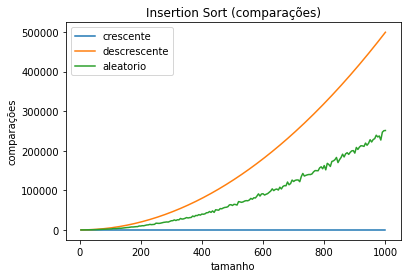

In [93]:
sortPlot(insertionSort, orderedCase, descendingCase, randomCase, 'Insertion Sort (comparações)')

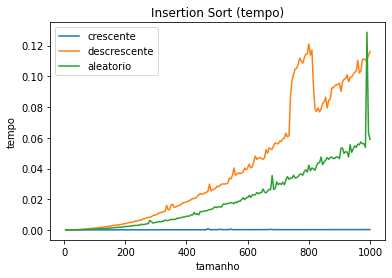

In [96]:
sortPlot(insertionSort, orderedCase, descendingCase, randomCase, 'Insertion Sort (tempo)', True)

> Merge Sort
- Melhor caso: $\Theta(n\log{n})$
- Pior caso: $\Theta(n\log{n})$
- Faz a mesma quantidade de comparações para o mesmo tamanho de vetor

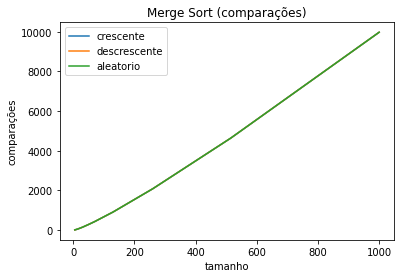

In [72]:
sortPlot(mergeSort, orderedCase, descendingCase, randomCase, 'Merge Sort (comparações)')

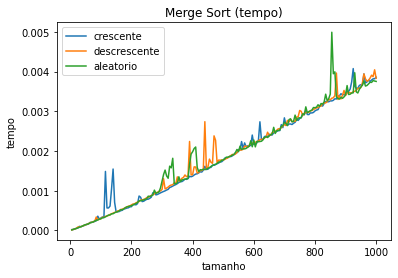

In [98]:
sortPlot(mergeSort, orderedCase, descendingCase, randomCase, 'Merge Sort (tempo)', True)

> Selection Sort
- Melhor caso: $\Theta(n^2)$
- Pior caso: $\Theta(n^2)$

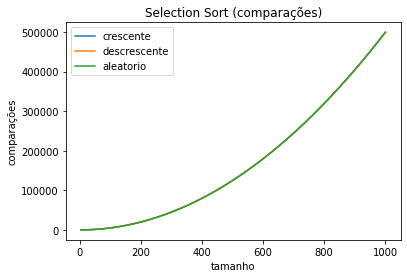

In [75]:
sortPlot(selectionSort, orderedCase, descendingCase, randomCase, 'Selection Sort (comparações)')

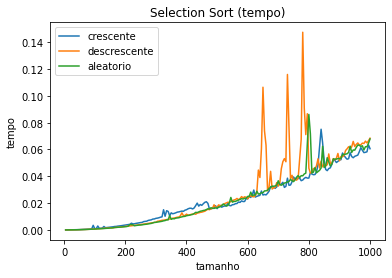

In [99]:
sortPlot(selectionSort, orderedCase, descendingCase, randomCase, 'Selection Sort (tempo)', True)

> Bubble Sort
- Melhor caso: $\Theta(n)$ ocorre quando o vetor está em ordem crescente
- Pior caso: $\Theta(n^2)$ ocorre quando o vetor está em ordem decrescente

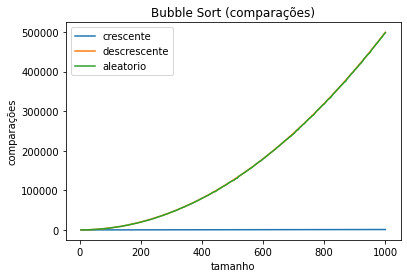

In [77]:
sortPlot(bubbleSort, orderedCase, descendingCase, randomCase, 'Bubble Sort (comparações)')

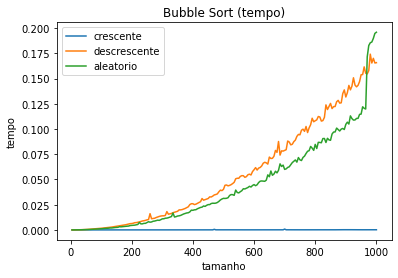

In [107]:
sortPlot(bubbleSort, orderedCase, descendingCase, randomCase, 'Bubble Sort (tempo)', True)

> Heap Sort
- Melhor caso: $\Theta(n)$ quando todos os elementos do vetor são iguais
- Pior caso: $\Theta(n\log{n})$ quando o vetor é aleatório

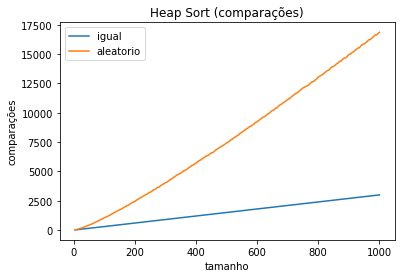

In [106]:
sortEqual(heapSort, (arrayEqual, randomCase), 'Heap Sort (comparações)')

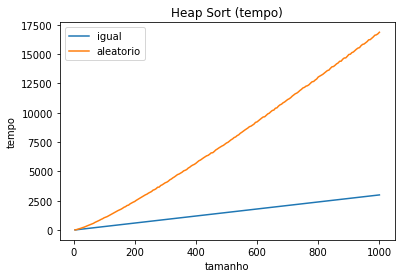

In [105]:
sortEqual(heapSort, (arrayEqual, randomCase), 'Heap Sort (tempo)', True)

> Quick Sort
- Melhor caso: $\Theta(n\log{n})$ quando todos os pivôs selecionados geram partições de tamanho próximo de $n\over{2}$
- Pior caso: $\Theta(n^2)$ quando todos os pivôs selecionados geram partições de tamanho $1$ e $n-1$

b) Comparação entre os metodos de ordenação

In [122]:
def sortCasesPlot(cases, legends, title):
  for n, ylabel in enumerate(['comparações', 'tempo']):
    for i, case in enumerate(cases):
      plot(case[n], f"{title[i]} ({ylabel})", ylabel , legends)

def sortCases(cases, fTest):
  return [v[0] for v in map(lambda p: fTest(p[0], (p[1],)), cases)]

def testCompAndTime(cases):
  return sortCases(cases, sort), sortCases(cases, timeSort)


bestCasesArray = [
  (insertionSort, arrayOrdered),
  (mergeSort, arrayOrdered),
  (selectionSort, arrayOrdered),
  (bubbleSort, arrayOrdered),
  (heapSort, arrayEqual),
  (quickSort, randomArray)
]

badCasesArray = [
  (insertionSort, descendingArray),
  (mergeSort, descendingArray),
  (selectionSort, descendingArray),
  (bubbleSort, descendingArray),
  (heapSort, randomArray),
  (quickSort, descendingArray)
]

randomCasesArray = [
  (insertionSort, randomArray),
  (mergeSort, randomArray),
  (selectionSort, randomArray),
  (bubbleSort, randomArray),
  (heapSort, randomArray),
  (quickSort, randomArray)
]

bestCases = testCompAndTime(bestCasesArray)
badCases = testCompAndTime(badCasesArray)
randomCases = testCompAndTime(randomCasesArray)

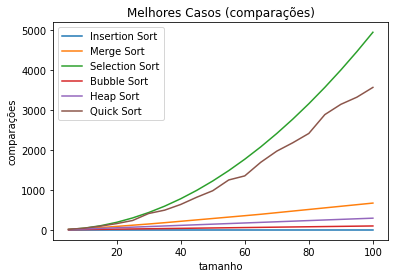

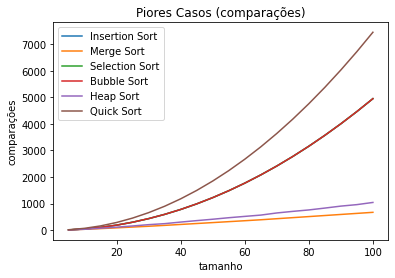

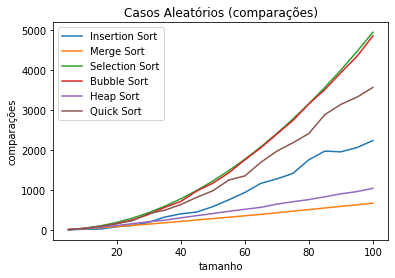

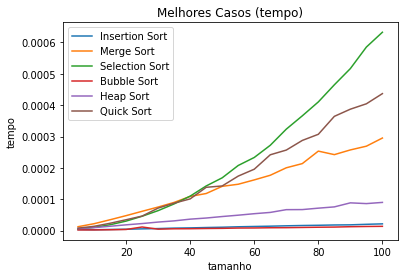

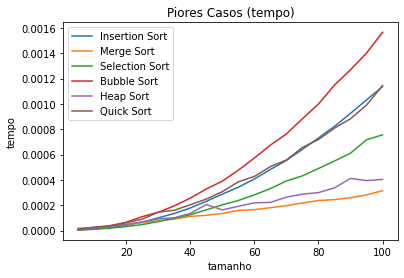

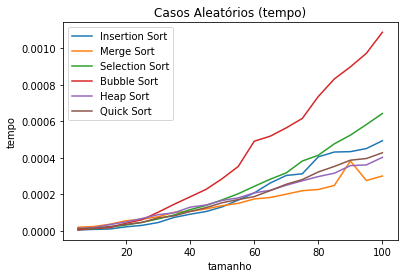

In [123]:
legends = 'Insertion Sort', 'Merge Sort', 'Selection Sort', 'Bubble Sort', 'Heap Sort', 'Quick Sort'
sortCasesPlot((bestCases, badCases, randomCases), legends, ('Melhores Casos','Piores Casos', 'Casos Aleatórios'))